## importing packages

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#keras
from keras import *
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM,Flatten,Dropout,Conv2D
from tensorflow.keras.optimizers import  Adam
from keras import regularizers



## Precessing with datas

In [40]:
#importing datasets
train=pd.read_csv('book1.csv')
test=pd.read_csv('book1.csv')


In [41]:
train.isnull().sum()

Source.Name      0
Statement        1
Output         862
dtype: int64

In [42]:
train=train.dropna()

In [43]:
train.isnull().sum()

Source.Name    0
Statement      0
Output         0
dtype: int64

In [44]:
test=test.dropna()

In [45]:
test.isnull().sum()

Source.Name    0
Statement      0
Output         0
dtype: int64

In [47]:
import pandas as pd
import re

# Define a regular expression to match non-English characters
non_english = re.compile('[^a-zA-Z0-9\s]')

# Loop through each column and replace any non-English characters with an empty string
for col in train.columns:
    if train[col].dtype == object:  # Check if the column is a string or object type
        train[col] = train[col].apply(lambda x: non_english.sub('', x) if isinstance(x, str) else x)

# Save the cleaned dataframe back to a CSV file
train.to_csv('book4.csv', index=False)

In [48]:
train['Output'].unique()

array(['Mixedfeelings', 'Positive', 'unknownstate', 'Negative', 'Negati',
       'N', 'Neg', '  ', '   ', '          ', 'D', '      ', '',
       '40 punch uff  mammukkaaa aaaaaaaaaa', '             ', '6', 'p',
       ' ithpwolikkum',
       ' adhyam poyi mogam nokk kannadiyil ennitum kanunnillel valla docterem kondu kanik',
       'iiiiiii', 'category', 'Positive '], dtype=object)

In [50]:
# Drop rows with unclear values
train = train[~train['Output'].isin(['iiiiiii', 'p', '6', '40 punch uff mammukkaaa aaaaaaaaaa', 'D', 'Negati'])]

# Replace variations of the four categories of interest
train['Output'].replace({'Neg': 'Negative', 'N': 'Negative', 'Positive ': 'Positive', 'positive': 'Positive', 'Mixed_feelings': 'Mixedfeelings'}, inplace=True)

# Keep only the four categories of interest
train = train[train['Output'].isin(['Positive', 'unknownstate', 'Negative', 'Mixedfeelings'])]


In [94]:
#Label counts
train['Output'].value_counts()

Positive         28886
unknownstate     11239
Negative          7316
Mixedfeelings     5435
Name: Output, dtype: int64

In [52]:
train.to_csv('book5.csv', index=False)

In [86]:
#importing datasets
train=pd.read_csv('book5.csv')
test=pd.read_csv('book5.csv')


In [87]:
train.isnull().sum()

Source.Name    0
Statement      2
Output         0
dtype: int64

In [88]:
train=train.dropna()

In [89]:
train.isnull().sum()

Source.Name    0
Statement      0
Output         0
dtype: int64

In [90]:
test.isnull().sum()

Source.Name    0
Statement      2
Output         0
dtype: int64

In [91]:
test=test.dropna()

In [92]:
test.isnull().sum()

Source.Name    0
Statement      0
Output         0
dtype: int64

In [96]:
train['Output'].value_counts()

Positive         28886
unknownstate     11239
Negative          7316
Mixedfeelings     5435
Name: Output, dtype: int64

In [97]:
train['Output'].unique()

array(['Mixedfeelings', 'Positive', 'unknownstate', 'Negative'],
      dtype=object)

## Removing punctuations

In [98]:
#removing punctuations
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc
train['Statement'] = train['Statement'].fillna('').apply(lambda x: remove_punctuations(x))



In [99]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
train['Output']=Encoder.fit_transform(train['Output'])
test['Output']= Encoder.fit_transform(test['Output'])



In [100]:
train['Output'].value_counts()

2    28886
3    11239
1     7316
0     5435
Name: Output, dtype: int64

# **Models**

# LSTM

Word2vec One_hot

In [65]:
from keras.preprocessing.text import one_hot

#use onehot in train
voc_size = 20000

train_onehot = [one_hot(words, voc_size)for words in train['Statement']]
#dev_onehot = [one_hot(words, voc_size)for words in dev['text']]
test_onehot = [one_hot(words, voc_size)for words in test['Statement']]



In [66]:
#performing pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=10
embedded_train=pad_sequences(train_onehot,padding='pre',maxlen=sent_length)
#embedded_dev=pad_sequences(dev_onehot,padding='pre',maxlen=sent_length)
embedded_test = pad_sequences(test_onehot,padding='pre',maxlen=sent_length)



In [67]:
#spliting datas for training
train['category_category'] = pd.Categorical(train['Output'])

X_train = np.array(embedded_train)
y_train = np.array(train['Output'])

#X_dev =  np.array(embedded_dev)
#y_dev = np.array(dev['category'])

X_test =  np.array(embedded_test)
y_test = np.array(test['Output'])



In [68]:
X_test[1]

array([    0,     0,     0,     0, 16448,  6080, 16484,  4291,  2389,
       16448])

In [70]:
dim=64
num_classes =4
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(voc_size, dim, input_length=sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [71]:
#summary of LSTM model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            1280000   
                                                                 
 dropout_4 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 4)                 124       
                                                                 
Total params: 1,349,154
Trainable params: 1,349,154
No

In [72]:
import matplotlib.pyplot as plt


In [73]:
# Train the model and save the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)



Epoch 1/10
827/827 [==============================] - 39s 43ms/step - loss: 1.0411 - accuracy: 0.5861 - val_loss: 0.8879 - val_accuracy: 0.6701
Epoch 2/10
827/827 [==============================] - 35s 43ms/step - loss: 0.8864 - accuracy: 0.6583 - val_loss: 0.7393 - val_accuracy: 0.7262
Epoch 3/10
827/827 [==============================] - 35s 43ms/step - loss: 0.7670 - accuracy: 0.7119 - val_loss: 0.6242 - val_accuracy: 0.7851
Epoch 4/10
827/827 [==============================] - 36s 43ms/step - loss: 0.6614 - accuracy: 0.7554 - val_loss: 0.5380 - val_accuracy: 0.8164
Epoch 5/10
827/827 [==============================] - 37s 45ms/step - loss: 0.5767 - accuracy: 0.7863 - val_loss: 0.4699 - val_accuracy: 0.8344
Epoch 6/10
827/827 [==============================] - 32s 38ms/step - loss: 0.5167 - accuracy: 0.8080 - val_loss: 0.4234 - val_accuracy: 0.8483
Epoch 7/10
827/827 [==============================] - 23s 28ms/step - loss: 0.4754 - accuracy: 0.8217 - val_loss: 0.3938 - val_accuracy:

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"test_acc={test_acc}")

1653/1653 [==============================] - 4s 3ms/step - loss: 0.3359 - accuracy: 0.8737
test_acc=0.8736667037010193


In [75]:
#classified with test set
y_pred = model.predict(X_test)

In [76]:
y_pred

array([[9.99888062e-01, 6.24667518e-05, 4.92948675e-05, 9.86668454e-08],
       [1.28219644e-05, 2.06748318e-05, 9.99958038e-01, 8.43561247e-06],
       [4.68140759e-04, 6.15505793e-04, 9.97715950e-01, 1.20040018e-03],
       ...,
       [4.54822583e-07, 9.99936938e-01, 5.87918330e-05, 3.78994082e-06],
       [1.18411815e-04, 6.76065974e-05, 9.99543965e-01, 2.69927055e-04],
       [4.17701490e-02, 6.47429526e-02, 6.55909538e-01, 2.37577364e-01]],
      dtype=float32)

In [77]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


In [78]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [79]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      5435
           1       0.95      0.79      0.86      7316
           2       0.83      0.98      0.90     28886
           3       0.95      0.72      0.82     11239

    accuracy                           0.87     52876
   macro avg       0.91      0.81      0.85     52876
weighted avg       0.88      0.87      0.87     52876



In [80]:
print(accuracy_score(y_test,y_pred_labels))

0.8736666918828958


In [112]:
model.save("model.h5")

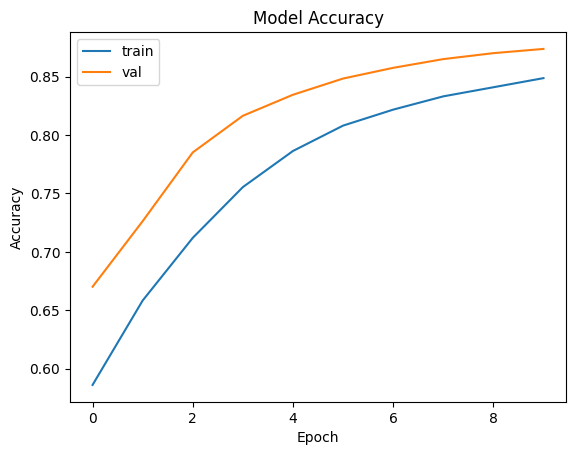

In [82]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

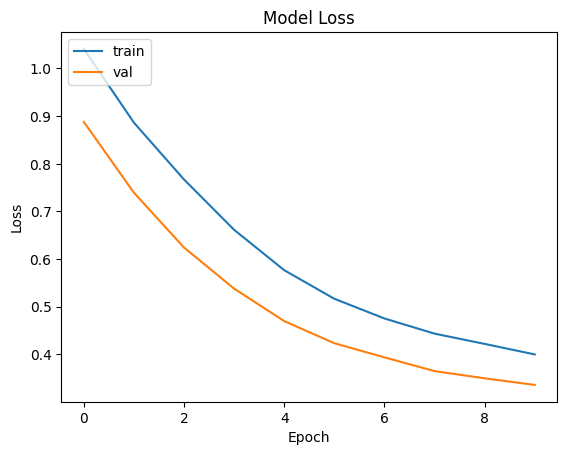

In [83]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [84]:
import numpy as np
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
model = load_model("model.h5")

In [101]:
lable=['Mixed_feelings','Negative','Positive','unknown_state']

In [134]:
sen=np.array(["Sorry sir nim yella video nan nodidini yeno manku badidu nodona hantha download madidde e video nodi delete madidini sir thanks"])
voc_size = 20000

pre_word = [one_hot(words, voc_size)for words in sen]
sent_length=10
pre_embedded=pad_sequences(pre_word,padding='pre',maxlen=sent_length)
output=np.argmax(model.predict(pre_embedded))
lable[output]

In [135]:
output

2

In [115]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create tokenizer object
tokenizer = Tokenizer(num_words=voc_size, oov_token="<OOV>")

# Fit tokenizer on text data
tokenizer.fit_on_texts('Statement')

# Save tokenizer to file
import json

tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w", encoding="utf-8") as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
